<a href="https://colab.research.google.com/github/pkams/projetos_iniciais/blob/master/classificacao_de_objetos(rede_convolucional).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importando bibliotecas

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
# Visualização dos dados

[2]


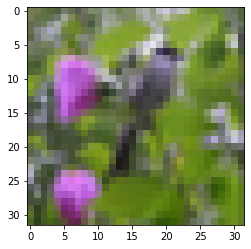

In [6]:
i = 300
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


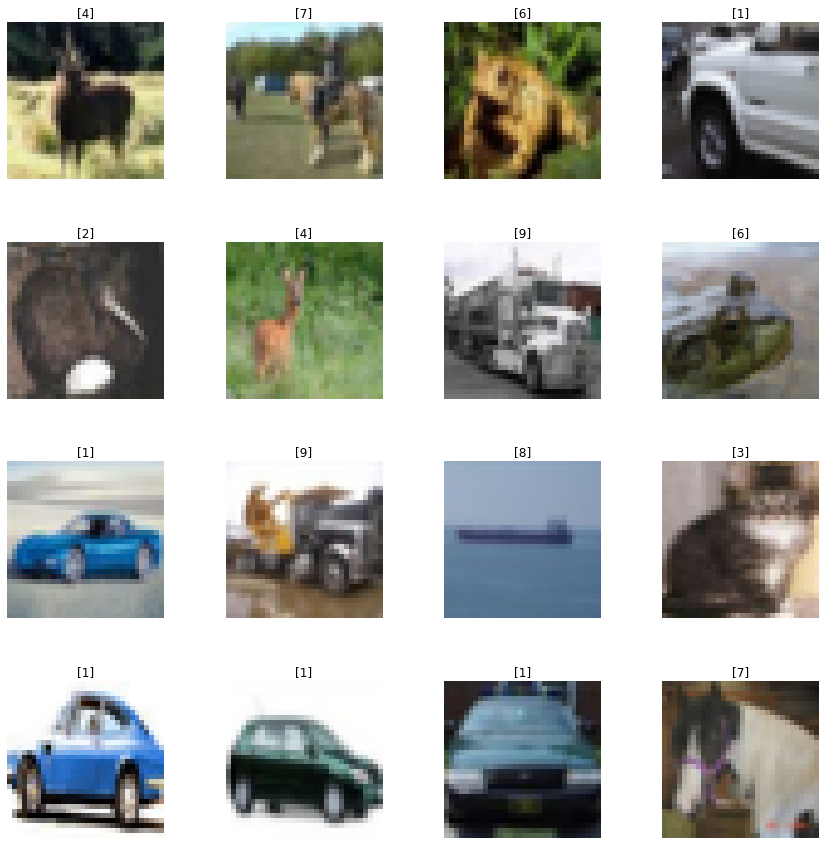

In [7]:
W = 4
L = 4

fig,axes = plt.subplots(L, W, figsize=(15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L * W):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [8]:
# Preparação dos dados

X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
X_train.shape

# Temos 3 canais

(50000, 32, 32, 3)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
number_cat = 10

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat) 

# Formato OneHotEncoder.
# Podemos usar ambos formatos (sparse ou onehotencoder)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [15]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [16]:
y_train.shape

(50000, 10)

In [17]:
# Construção do modelo

cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation='relu'))

cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [0]:
cnn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = cnn.fit(X_train, y_train, epochs=100, batch_size=500)

Epoch 1/100
100/100 [==============================] - 6s 56ms/step - loss: 0.8090 - accuracy: 0.7109
Epoch 2/100
100/100 [==============================] - 6s 55ms/step - loss: 0.7787 - accuracy: 0.7227
Epoch 3/100
100/100 [==============================] - 6s 55ms/step - loss: 0.7517 - accuracy: 0.7342
Epoch 4/100
100/100 [==============================] - 5s 55ms/step - loss: 0.7172 - accuracy: 0.7440
Epoch 5/100
100/100 [==============================] - 5s 55ms/step - loss: 0.6920 - accuracy: 0.7560
Epoch 6/100
100/100 [==============================] - 6s 55ms/step - loss: 0.6614 - accuracy: 0.7652
Epoch 7/100
100/100 [==============================] - 6s 55ms/step - loss: 0.6370 - accuracy: 0.7740
Epoch 8/100
100/100 [==============================] - 6s 56ms/step - loss: 0.6168 - accuracy: 0.7811
Epoch 9/100
100/100 [==============================] - 6s 56ms/step - loss: 0.5939 - accuracy: 0.7884
Epoch 10/100
100/100 [==============================] - 6s 55ms/step - loss: 0.574

In [0]:
# Avaliação do modelo

In [0]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat) 


In [36]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8160 - accuracy: 0.7986


[0.8160228729248047, 0.7986000180244446]

In [0]:
predicted_classes = cnn.predict_classes(X_test)

In [38]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

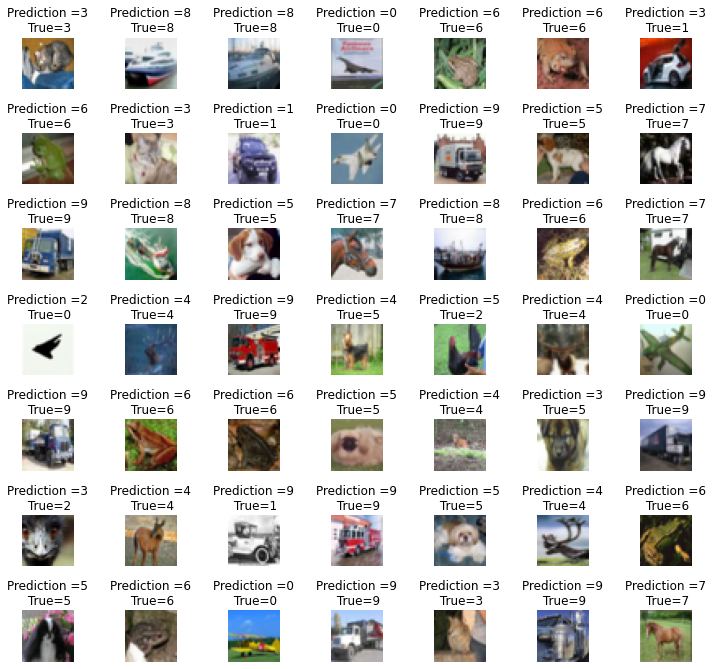

In [43]:
L = 7
W = 7
fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction ={}\n True={}'.format(predicted_classes[i],y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

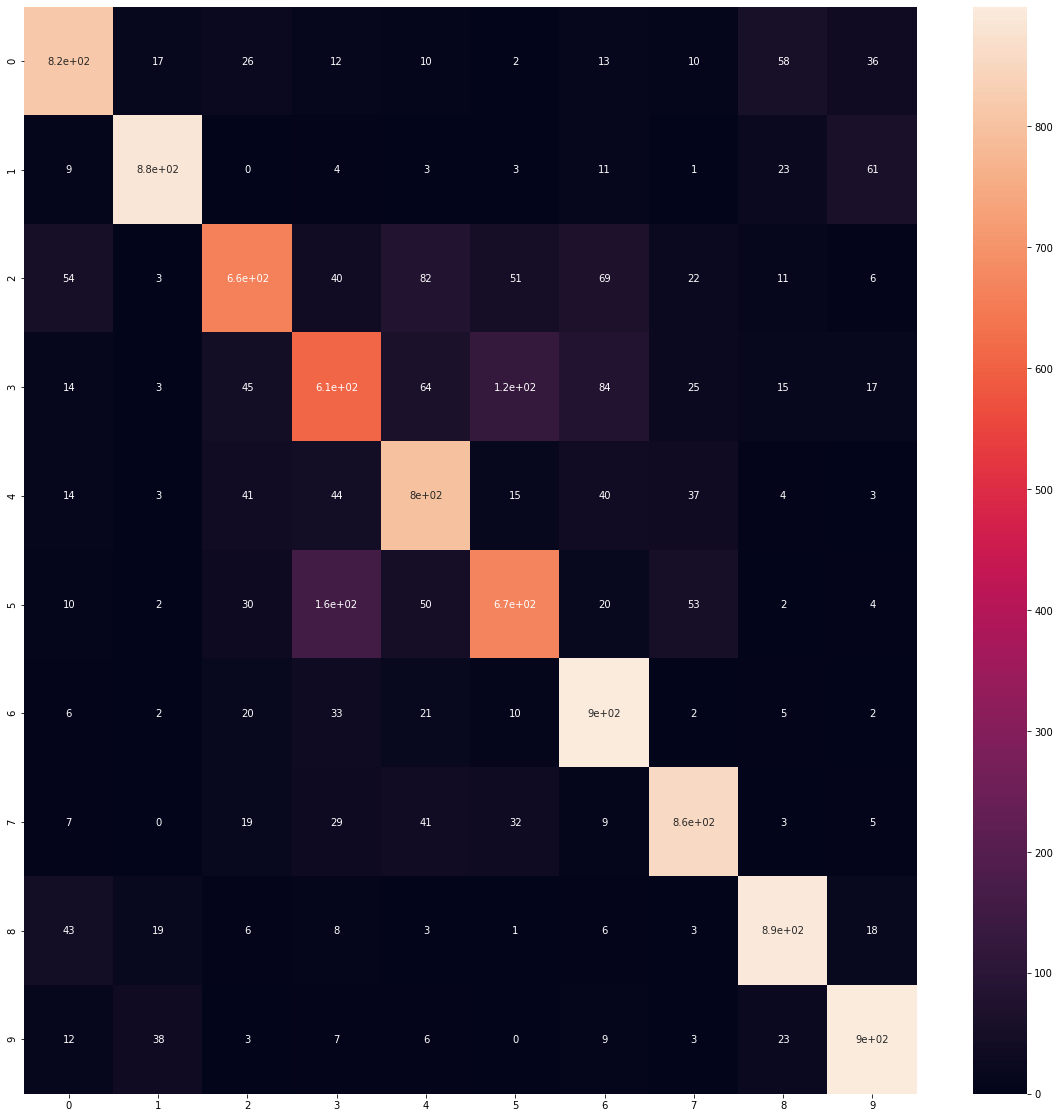

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1000
           1       0.91      0.89      0.90      1000
           2       0.78      0.66      0.71      1000
           3       0.64      0.61      0.63      1000
           4       0.74      0.80      0.77      1000
           5       0.74      0.67      0.70      1000
           6       0.78      0.90      0.83      1000
           7       0.85      0.85      0.85      1000
           8       0.86      0.89      0.88      1000
           9       0.86      0.90      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

